# CARGANDO EL DATASET
* Importamos la librería para cargar la información previamente scrapeada de Maldita.es.
* 1224 noticias actualmente


In [175]:
import pickle

In [176]:
infile = open("Maldita_Dataset_02-07-2020",'rb')
dataset = pickle.load(infile)
len(dataset)

1224

# IMPORTING LIBRARIES
* Imports to preprocess the artcicles.

In [177]:
# -*- coding: utf-8 -*-
import re, string, unicodedata
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

In [178]:
#De los diccionarios de articulos ** me quedo solo con el contenido de x articulos del dataset y los introduzco en una lista
#de contenidos.
# **article = {"Title": title, "Publication_date": date, "Content": content, "URL": url, "Fuente": "Maldita.es"}
content_list = []
for a in dataset:
    content_list.append(a['Content'])

In [179]:
print(dataset[43])

{'Title': 'No, esta foto de una mujer abrazando a una agente de policía no ha sido tomada ni en el barrio de Salamanca de Madrid ni durante la crisis del coronavirus: fue en Barcelona en 2017', 'Publication_date': '16/05/2020', 'Content': 'Está circulando una foto en la que una mujer, que lleva una bandera de España, abraza a una agente de policía. Se comparte con mensajes como "Aquí una clara imagen de la policía repartiendo porrazos en el barrio de Salamanca". No obstante, es un bulo que esta imagen haya sido tomada en este barrio madrileño o que sea actual. Fue tomada durante la manifestación a favor de la unidad de España del 8 de octubre de 2017 en Barcelona. La Sexta emitió esta imagen el 8 de octubre de 2017, cuando en la manifestación a favor de la unidad de España de Barcelona algunas personas mostraron su afecto a agentes de la policía. Entre ellas, la imagen del abrazo que ahora circula descontextualizada (min. 00:06 aprox.):', 'URL': 'https://maldita.es/malditob

In [180]:
# This function "get_top_10_keywords" returns the top10 frequent words.
def get_top_10_keywords(words):
    """
    Return the top10 frequent words.
    :param list word: List containing all the words
    :return: ordered list with the top-10 most frequent words (in descending order)
    :rtype: list
    """
    counts = Counter(words)
    ordered_list = sorted(words, key=counts.get, reverse=True)
    unique_list = []
    
    #10 most common
    most_com = counts.most_common()[0:10]
    
    return most_com
    
    #El codigo de abajo devuelve una lista de tuplas con el numero de repeticiones de cada valor
    #for ol in ordered_list:
    #    if ol not in unique_list:
    #        unique_list.append(ol)
    #return unique_list[:10]

# This function "show_top_10_keywords" prints the top 10 words:

def show_top_10_keywords(processed_articles):
    # Show the top-10 most frequent words
    for article_words in processed_articles:
        # Get te top-10 words
        top_10_words = get_top_10_keywords(article_words)
        
        print("\nTOP 10 words:")
        for el in top_10_words:
            print(el[0], ':', el[1])

# Preprocessing

* Convierte el texto a minúscula
* Elimina los caracteres que no sean ASCII
* Quita signos de puntuación
* Quita las stopwords
* Se realiza la Lemmatizacion de los tokens
* Extrae las 10 palabras más frecuentes de los artículos

In [181]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_numbers(data):
    """Remove numbers"""
    articles = []
    for a in data:
        article = []
        for word in a:
            if not word.isdigit():
                article.append(word)
        articles.append(article)
    return articles

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\sÀ-ú]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords_from_all_news(news, custom_stopwords):
    """
    Method to remove the stop words from a sentence.
    :param str sentence: List of all news
    :param list stopwords: List containing the stopwords to remove from the sentences
    :return: list of news with the stopwords removed
    :rtype: list
    """
    important_words_in_news=[]
    for one_news in news:
        new_words = []
        
        for word in one_news:
        # Only keep the important words
            if word not in custom_stopwords:
                new_words.append(word)         
        important_words_in_news.append(new_words)
        
    return important_words_in_news

def translate_accents(articles):
    """ Method used to replace wrong accent characters by good one on all articles"""
    accent_text = []
    for bad_article in articles:
        good_accent_article = replace_all({"á":"á", "é":"é", "í":"í", "ó":"ó", "ú":"ú"}, bad_article)
        accent_text.append(good_accent_article)
    return accent_text

def replace_all(dict, str):
    """ Method used to replace wrong accent characters by good one"""
    for key in dict:
        str = str.replace(key, dict[key])
    return str

In [182]:
def nlp_articles(articles):
    """
    Preprocesamiento:
        * Perform some normalization:
            -Convierte el texto a minúscula
            -Elimina los caracteres que no sean ASCII
            -Quita signos de puntuación
            -Quita las stopwords
            -Se realiza la Lemmatizacion de los tokens
            -Extrae las 10 palabras más frecuentes de los artículos
            
    :param list articles: List containing all the news we will process
    :return: list of news tokenized into words
    :rtype: list
    """
    print("PREPROCESSING...")
    print('articles len', len(articles[0]))
    print('articles len', len(articles[1]))
    
    # Lowercase all the articles
    lower_articles = to_lowercase(articles)
    print('lower len', len(lower_articles[0]))
    print('lower len', len(lower_articles[1]))
    
    #Translate bad accents by good ones
    good_accent_articles = translate_accents(lower_articles)
    
    #Remove the `` and '' and probably more useless stuff
    accent_articles2 = remove_punctuation(good_accent_articles)
    print('accent_articles2 len', len(accent_articles2[0]))
    print('accent_articles2 len', accent_articles2[1])
    
    
    #print('aaaaaaaaa',accent_articles2)
    
    
    #NLTK lemmatizer
    # Get the spanish lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_articles = []
    for article in accent_articles2:
        article_words = []
        tokenized_article = nltk.word_tokenize(article)
        # The article contains all the words. Separate them
        for token in tokenized_article:
            article_words.append(lemmatizer.lemmatize(token))
        # The next step expects a string. Let's concatenate the separate words using blanks.
        lemmatized_articles.append(article_words)
        
    '''
    
    #SPACY lemmatizer
    nlp = spacy.load('es_core_news_sm')
    lemmatized_articles = []
    for article in accent_articles2:
        article_words = []
        doc = nlp(article)
        for token in doc:
            article_words.append(token.lemma_)
        lemmatized_articles.append(article_words)
    '''
        
    print('lemmatized len ', len(lemmatized_articles[0]))
    print('lemmatized len ', len(lemmatized_articles[1]))
    #print(lemmatized_articles[1])
    
    # Prepare our custom list of stopwords
    custom_stopwords = ["Noticia", "Noticias", "Parir", "Comer", "Bulo"]
    custom_stopwords += STOP_WORDS
    
    # Merging 2 stopwords lists
    for e in stopwords.words('spanish'):
        if e not in custom_stopwords:
            custom_stopwords.append(e)
    
    # Add all the punctuation signs to the list of stopwords
    custom_stopwords += list(string.punctuation)
    # lowercase all the stopwords
    my_stopwords = to_lowercase(custom_stopwords)
    
    articles_no_stopwords = remove_stopwords_from_all_news(lemmatized_articles, my_stopwords)
    print('articles_no_stopwords len', len(articles_no_stopwords[0]))
    print('articles_no_stopwords len', len(articles_no_stopwords[1]))
    
    articles_no_numbers = remove_numbers(articles_no_stopwords)
    
    return articles_no_numbers

# Obtengo las keywords
processed_articles = nlp_articles(content_list)

# Muestro las top-10 keywords
show_top_10_keywords(processed_articles)

PREPROCESSING...
articles len 3029
articles len 2196
lower len 3029
lower len 2196
accent_articles2 len 2901
accent_articles2 len circula por whatsapp una cadena en la que se dice que correos está redondeando los precios de sus servicios y que ese dinero se destina para pagar mascarillas y elementos de protección para los funcionarios de correos es un bulo se trata de una campana que han lanzado con el objetivo de recaudar fondos para la investigación contra la covid19desde correos nos explican que han incorporado en la red de oficinas la figura del redondeo solidario en su pasarela de pago para ayudar a recaudar fondos y hacer frente al covid19 para ello los clientes de correos pueden redondear el importe final de su compra y donar los céntimos restantes a la lucha contra el coronavirus cada vez que utilicen su tarjeta como medio de pagosegún correos todo lo recaudado se destinará a un proyecto conjunto de irsicaixa con el barcelona supercomputing center y el centro de investigación e

TOP 10 words:
mayo : 22
cuotas : 14
abril : 11
iban : 10
tributaria : 9
hacienda : 8
marzo : 8
pasar : 8
agencia : 7
real : 7

TOP 10 words:
andalucía : 19
junta : 13
escudo : 11
insignia : 7
atril : 7
moreno : 6
sello : 6
distintivo : 4
miembros : 4
gobierno : 4

TOP 10 words:
email : 6
tributaria : 6
agencia : 5
medidas : 4
tributarias : 3
mensaje : 3
phishing : 3
covid19 : 2
evitar : 2
suspensión : 2

TOP 10 words:
coronavirus : 31
cadena : 27
whatsapp : 23
contamos : 12
leer : 12
puedes : 12
mensaje : 12
preguntado : 11
virus : 9
afirma : 8

TOP 10 words:
dirección : 2
incorrecta : 2
caso : 2
recibes : 1
correo : 1
electrónico : 1
mail : 1
correos : 1
asegura : 1
podido : 1

TOP 10 words:
cuestionario : 3
carrefour : 3
caso : 3
phishing : 3
datos : 3
web : 3
pasar : 2
supermercados : 2
aportar : 2
preguntado : 1

TOP 10 words:
subvención : 3
casos : 2
phishing : 2
mail : 2
ing : 2
elegible : 2
datos : 2
dinero : 2
malditaes : 1
llevamos : 1

TOP 10 words:
phishing : 4
datos : 4
men

medicalizado : 4
renfe : 4
atadas : 3
asiento : 3

TOP 10 words:
zoom : 8
aplicación : 7
guardia : 5
civil : 4
seguridad : 4
cadena : 3
mensaje : 3
circula : 2
desinstalar : 2
corre : 2

TOP 10 words:
supuesta : 3
mac : 3
oferta : 3
datos : 3
web : 3
espana : 2
phishing : 2
promoción : 2
cosmetic : 2
página : 2

TOP 10 words:
crisis : 7
coronavirus : 7
italia : 6
diputados : 5
número : 4
senadores : 4
eliminan : 3
plenum : 3
octubre : 3
contenido : 2

TOP 10 words:
ferrero : 8
mensaje : 7
página : 7
pascua : 6
rocher : 5
web : 5
huevos : 4
datos : 4
companía : 3
personales : 3

TOP 10 words:
estudio : 6
espana : 3
universidad : 2
oxford : 2
otorga : 2
actuación : 2
puntuación : 2
gestión : 2
mide : 2
restricciones : 2

TOP 10 words:
foto : 4
aparecen : 3
fraga : 3
rajoy : 3
imagen : 2
fundador : 2
alianza : 2
popular : 2
manuel : 2
mariano : 2

TOP 10 words:
torrevieja : 4
vídeo : 2
diciendo : 2
virus : 2
coronavirus : 2
madrileno : 2
alarma : 2
hombre : 2
viajado : 2
residente : 2

TO

compra : 3
medios : 2
comunicación : 2
permitido : 2
acompanar : 2

TOP 10 words:
mm : 7
clorito : 5
sodio : 5
producto : 5
pamies : 3
ministerio : 3
sanidad : 3
mineral : 3
consume : 3
josep : 2

TOP 10 words:
campana : 5
salut : 5
sabadell : 4
hospital : 4
pacientes : 4
coronavirus : 3
ciudad : 3
decisión : 3
cataluna : 3
govern : 3

TOP 10 words:
empresa : 7
pacientes : 7
domicilio : 7
invasiva : 7
vitalaire : 6
mediano : 6
ventilación : 6
mecánica : 6
respirador : 5
alvise : 4

TOP 10 words:
sanytol : 3
muestras : 3
toallitas : 3
desinfectantes : 3
datos : 3
ofreciendo : 2
correo : 2
electrónico : 2
gratis : 2
personales : 2

TOP 10 words:
vídeo : 4
doctor : 4
espanol : 4
espana : 3
idiomas : 3
periodista : 2
whatsapp : 2
inglés : 2
tratara : 2
mundo : 2

TOP 10 words:
ano : 2
ocu : 2
cadena : 2
llamada : 2
cobrarán : 1
moviéndose : 1
desmentimos : 1
regresa : 1
marzo : 1
alerta : 1

TOP 10 words:
virus : 10
coronavirus : 6
kawaoka : 5
origen : 4
laboratorio : 4
virólogo : 3
rumore

supuestos : 2
médicos : 2

TOP 10 words:
málaga : 4
ciudades : 4
ministerio : 3
defensa : 3
diputación : 3
drone : 3
whatsapp : 2
alerta : 2
cádiz : 2
ropa : 2

TOP 10 words:
salud : 8
servicio : 6
teléfono : 5
madrid : 4
andalucía : 4
número : 3
responde : 3
cadena : 3
comunidad : 3
renovar : 3

TOP 10 words:
amancio : 4
ortega : 4
país : 3
circula : 3
dirigentes : 3
acepten : 3
donaciones : 3
sanidad : 3
pública : 3
actual : 3

TOP 10 words:
caza : 6
persona : 6
conejos : 5
castilla : 4
león : 4
grupos : 4
marzo : 4
junta : 3
permitida : 3
alarma : 3

TOP 10 words:
valladolid : 9
parques : 8
coronavirus : 5
ayuntamiento : 5
fumigando : 4
adra : 4
malditaes : 4
ciudad : 4
parque : 4
producto : 3

TOP 10 words:
casa : 6
medidas : 5
fundación : 4
persona : 4
zapatos : 4
espana : 3
documento : 3
voluntarios : 3
salvamento : 3
bolivia : 3

TOP 10 words:
captura : 6
almería : 6
busca : 5
hospital : 4
positivo : 4
coronavirus : 4
foto : 3
haberse : 3
torrecárdenas : 3
policía : 3

TOP 10 wo

datos : 24
hombre : 20
web : 17
año : 14
mujeres : 13
madrid : 12
violencia : 12
género : 10
contenido : 10
mujer : 9

TOP 10 words:
maldita : 4
semana : 3
malditaes : 2
hora : 2
rutina : 1
dificulta : 1
desmentidos : 1
verificaciones : 1
publicamos : 1
ponéroslo : 1

TOP 10 words:
cerveza : 13
corona : 8
encuesta : 7
compraría : 5
coronavirus : 5
cnn : 4
estadounidenses : 4
the : 4
circunstancia : 3
beben : 3

TOP 10 words:
coronavirus : 7
covid19 : 4
años : 3
tipos : 3
virus : 2
unidos : 2
finale : 2
prevenir : 2
patente : 2
actual : 2

TOP 10 words:
cita : 7
darwin : 7
erasmus : 6
imperio : 6
américa : 5
royal : 5
españa : 4
society : 4
viajes : 3
español : 3

TOP 10 words:
murcia : 5
coronavirus : 5
confirmado : 4
hospital : 3
caso : 3
informe : 2
santa : 2
lucía : 2
región : 2
corresponde : 2

TOP 10 words:
ambulatorio : 3
sevilla : 3
aljarafe : 2
informa : 2
cachorro : 2
coronavirus : 2
web : 1
publicó : 1
marzo : 1
contenido : 1

TOP 10 words:
consentimiento : 9
relaciones : 8
s

portal : 5
contenido : 4
fecha : 4

TOP 10 words:
niña : 4
ciega : 3
vuelto : 2
operar : 2
malditaes : 2
mover : 1
foto : 1
supuestamente : 1
asegura : 1
difundida : 1

TOP 10 words:
web : 4
falcon : 4
pedro : 4
sánchez : 4
contenido : 3
imagen : 3
abc : 3
voz : 2
becario : 2
ii : 2

TOP 10 words:
imágenes : 5
ve : 4
bebé : 4
china : 4
forense : 4
cortando : 3
coronavirus : 3
rojanasunand : 3
mujer : 2
persona : 2

TOP 10 words:
whatsapp : 5
foto : 2
difundir : 2
tipo : 2
compartido : 2
extremo : 2
recibes : 1
niño : 1
enfermo : 1
compartida : 1

TOP 10 words:
erupción : 3
volcán : 3
octubre : 3
vídeo : 2
isla : 2
blanca : 2
zelanda : 2
diciembre : 2
simulación : 2
circula : 2

TOP 10 words:
putin : 10
presidente : 4
referencia : 4
vídeo : 4
transcripción : 4
rusia : 3
vladimir : 3
supuestamente : 3
testigos : 3
traducción : 3

TOP 10 words:
endesa : 7
sm : 6
phishing : 6
web : 6
caso : 4
datos : 3
reembolso : 3
enlace : 3
utiliza : 2
hacerse : 2

TOP 10 words:
manos : 20
lavaba : 6
se

aparece : 5
agua : 4
aseguran : 4

TOP 10 words:
colegio : 6
educación : 5
religión : 5
prohibido : 4
enseñanza : 4
islámica : 4
alumnos : 4
aseguraba : 4
puedes : 4
malditaes : 3

TOP 10 words:
iglesia : 3
contenido : 3
redes : 2
sociales : 2
página : 2
satírica : 2
difundiendo : 1
imagen : 1
captura : 1
supuesta : 1

TOP 10 words:
consultado : 1
imagen : 1
compartida : 1
redes : 1
sociales : 1
foros : 1
internet : 1
carteles : 1
publicidad : 1
tinder : 1

TOP 10 words:
ministerio : 12
interior : 10
procedimiento : 6
extraordinario : 6
inmigrantes : 6
ilegal : 5
gobierno : 5
aprobado : 4
inmigración : 4
comunicado : 4

TOP 10 words:
correos : 11
sm : 5
mensaje : 5
phishing : 4
datos : 4
personales : 3
tasas : 3
enlace : 3
pagar : 3
entidad : 3

TOP 10 words:
ministerio : 8
persona : 6
discapacidad : 6
intelectual : 6
logo : 5
balears : 5
sanidad : 4
gallardo : 4
guía : 4
feaps : 4

TOP 10 words:
bitcoin : 9
timo : 3
falsas : 3
persona : 3
inversiones : 2
dani : 2
rovira : 2
hormiguero

falsas : 2
texto : 2

TOP 10 words:
organismo : 3
medicamentos : 3
gratis : 3
resaca : 3
bulos : 2
bingo : 2
másno : 2
fraude : 2
electoral : 2
votos : 2

TOP 10 words:
españa : 2
argentinos : 2
vuelve : 1
circular : 1
redes : 1
sociales : 1
aumentado : 1
sueldo : 1
presos : 1
ganan : 1

TOP 10 words:
datos : 11
phishing : 9
sm : 7
web : 7
correos : 7
banco : 6
hacerse : 5
casos : 5
nombre : 5
entidad : 5

TOP 10 words:
persona : 6
hombre : 6
valencia : 5
suicida : 4
violencia : 3
género : 3
suicidios : 3
suicidio : 3
verbales : 3
comentarios : 3

TOP 10 words:
año : 8
famosos : 4
will : 4
smith : 4
titulares : 4
contado : 4
declaraciones : 3
amancio : 3
ortega : 3
afirma : 3

TOP 10 words:
república : 4
inocentada : 4
contenido : 3
merkel : 2
consultado : 1
publicación : 1
titulada : 1
audio : 1
micro : 1
abierto : 1

TOP 10 words:
contenido : 5
pablo : 3
iglesias : 3
comprado : 3
porsche : 3
web : 2
moncloacom : 2
cayenne : 2
euro : 2
cv : 2

TOP 10 words:
bulos : 9
desinformaciones 

baloncesto : 3
mayo : 2
asegura : 2
funeral : 2
persona : 2

TOP 10 words:
persona : 16
musulmana : 11
terrorismo : 11
desinformación : 9
atentado : 7
espana : 7
comunidad : 7
medios : 7
islam : 7
mujer : 7

TOP 10 words:
traje : 13
radiación : 8
antena : 7
5g : 7
imagen : 6
persona : 5
afirma : 4
nájera : 4
antirradiación : 4
instalación : 3

TOP 10 words:
datos : 6
sorteo : 4
publicidad : 4
correo : 4
electrónico : 3
base : 3
viaje : 2
lanzarote : 2
verano : 2
enlace : 2

TOP 10 words:
bill : 4
gate : 4
foto : 3
edificio : 3
melinda : 3
global : 3
fachada : 2
fundación : 2
center : 2
for : 2

TOP 10 words:
chicas : 5
actual : 5
mensajes : 4
asesinato : 4
mosul : 3
islámico : 2
yazidíes : 2
grupo : 2
terrorista : 2
daesh : 2

TOP 10 words:
supuesta : 3
phishing : 3
web : 3
ikea : 2
regalo : 2
enlace : 2
comparte : 2
mensajes : 2
intentos : 2
preguntado : 1

TOP 10 words:
sorteo : 4
concurso : 4
datos : 3
base : 3
empresa : 3
información : 3
página : 3
facebook : 2
do : 2
caravanas : 2

In [183]:
processed_articles

[['alarma',
  'coronavirus',
  'circulado',
  'fotos',
  'vídeos',
  'animales',
  'campando',
  'anchas',
  'ciudades',
  'ciervos',
  'delfines',
  'flamenco',
  'supuestamente',
  'ocupado',
  'espacio',
  'humanos',
  'dejado',
  'confinamiento',
  'imágenes',
  'tipo',
  'podido',
  'semanas',
  'preguntado',
  'tomado',
  'crisis',
  'coronavirus',
  'montaje',
  'contamos',
  'ejemplosestá',
  'circulando',
  'vídeo',
  'redes',
  'sociales',
  'aparecen',
  'delfines',
  'nadando',
  'puerto',
  'deportivo',
  'supuestamente',
  'inactividad',
  'puerto',
  'provocada',
  'crisis',
  'sanitarium',
  'coronavirus',
  'vídeo',
  'movido',
  'diciendo',
  'paseo',
  'marítimo',
  'palma',
  'mallorca',
  'puerto',
  'denia',
  'alicante',
  'moraira',
  'alicante',
  'premia',
  'mar',
  'barcelona',
  'imágenes',
  'grabadas',
  'puerto',
  'deportivo',
  'atakoy',
  'ciudad',
  'estambul',
  'turquía',
  'contamos',
  'aquínos',
  'preguntando',
  'vídeo',
  'ven',
  'ciervos',


In [184]:
print(dataset[1])

{'Title': 'No, Correos no está "redondeando" sus precios con tal de comprar mascarillas para sus trabajadores: los fondos son para la investigación contra la COVID-19', 'Publication_date': '24/05/2020', 'Content': 'Circula por WhatsApp una cadena en la que se dice que Correos está "redondeando" los precios de sus servicios y que ese dinero se destina para "pagar mascarillas y elementos de protección para los funcionarios de Correos". Es un bulo: se trata de una campaña que han lanzado con el objetivo de recaudar fondos para la investigación contra la COVID-19.Desde Correos nos explican que han "incorporado en la red de oficinas la figura del \'redondeo solidario\' en su pasarela de pago, para ayudar a recaudar fondos y hacer frente al COVID‐19". Para ello, "los clientes de Correos pueden redondear el importe final de su compra y donar los céntimos restantes a la lucha contra el coronavirus cada vez que utilicen su tarjeta como medio de pago".Según Correos, todo lo recaudado se de

In [185]:
#TfidfVectorizer will L-2 normalize the output matrix by default, as a final step of the calculation. Having it normalized 
#means it will have only weights between 0 and 1.

vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, norm='l2')
tfidf_matrix = vectorizer.fit_transform(processed_articles)

#TfidfVectorizer ---> Equivalent to CountVectorizer followed by TfidfTransformer.
#idfs are calculated by TfidfTransformer's fit()
#tfidfs are calculated by TfidfTransformer's transform()
#tfs are calculated by CountVectorizer's fit_transform()

matrix_vocab = vectorizer.get_feature_names()
matrix = tfidf_matrix.todense()
#matrix_idf = vectorizer.idf_
print(tfidf_matrix.shape)
print(matrix_vocab)
#print(matrix[43])

#Posicion numero 36 -> 35 en la lista "Barcelona" aparece en ambos vectores de tf idf. La palabra aparece en los 2 documentos. 
#En el primero 2 veces y en el 2º 1 vez.
#En el primero hay 2 barcelonas-> 0,06 y en el segundo 1 barcelona -> 0,04

(1224, 28463)
['001el', '0042de', '044578433además', '0548pero', '0i', '0ms', '0quédateencasa', '1000cuando', '100el', '100gb', '100mg', '100o', '100º', '102la', '10440de', '104en', '105así', '1072tampoco', '10el', '10gb', '10h', '10k', '10n', '10news', '10th', '112no', '1130h', '116en', '117la', '1183aunque', '11asturias', '11m', '120º', '1221h', '123mientras', '1240am', '1247pm', '124pm', '12721iglesias', '12clm', '12h', '12minutoscom', '12minutoscoma', '12minutoscomla', '1303datosmetroel', '130o', '132secuencia', '13asturias', '13c', '13en', '13este', '144am', '1463por', '14cataluna', '14la', '14por', '14según', '1500472sic', '1500en', '1521esas', '158además', '15912009la', '15cyl', '15h', '15por', '1604h', '1640en', '165000un', '1652el', '174navarra', '17a', '17cantabria', '17h', '180infocouk', '180no', '1831en', '1839por', '185k', '18cantabria', '18si', '18th', '1920además', '1927contactada', '1945h', '1958malditaes', '1975en', '1992os', '19th', '1helicòpter', '1navarra', '1o', '1

In [186]:
import numpy as np
import sys
np.set_printoptions(threshold=1000) #sys.maxsize
matrix[43]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [187]:
print(matrix.shape)
print('video - 8:', matrix_vocab.index("video"))
print('correos - 9:', matrix_vocab.index("correo"))
print('puerto - 5:', matrix_vocab.index("puerto"))

#Por que bulo tiene menos valor de tf idf si sale las mismas veces en 1 mismo doc y sale 1 vez en el 2º doc mientras que puerto no sale en el 2 doc
video = matrix_vocab.index("video")
correos = matrix_vocab.index("correo")
puerto = matrix_vocab.index("puerto")


(1224, 28463)
video - 8: 27561
correos - 9: 6843
puerto - 5: 21873


In [188]:
A = np.asarray(matrix[1]).reshape(-1)
print(A[video])
print(A[correos])
print(A[puerto])

0.0
0.0
0.0


TF IDF mide la "importancia" de las palabras. Palabras que salen mucho tienen el tf idf mas bajo pero tambien lo tienen mas veces porque salen en mas documentos. Por otro lado las que salen menos como "ornitorrinco" tendrian un TF IDF más alto pero único puesto que salen en pocos documentos pero son palabras que caracterizan un documento en concreto

In [189]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['bulo bulo hola hola.',
            'bulo ornitorrinco']
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
matrix_vocab = vect.get_feature_names()
print(matrix_vocab)
X.todense()
'''

"\nfrom sklearn.feature_extraction.text import TfidfVectorizer\ncorpus = ['bulo bulo hola hola.',\n            'bulo ornitorrinco']\nvect = TfidfVectorizer()\nX = vect.fit_transform(corpus)\nmatrix_vocab = vect.get_feature_names()\nprint(matrix_vocab)\nX.todense()\n"

### CLUSTERING SECTION

* Clusterización empleando MiniBatchKMeans puesto que su ejecución es mas rápida y los resultados son muy similares al Kmeans.
* Método del codo -> Buscamos el número óptimo de clusters en base al SSE. Nos quedamos con el número de clusters más óptimo y más visual para el análisis.
* Dibujamos los clusters en base al PCA y al TSNE.
* Mostramos el top keywords de cada cluster.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sum of squared errors (SSE) - SSE is the sum of the squared differences between each observation and its group's mean. It can be used as a measure of variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


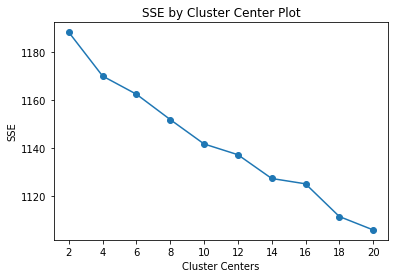

In [191]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_matrix, 20)

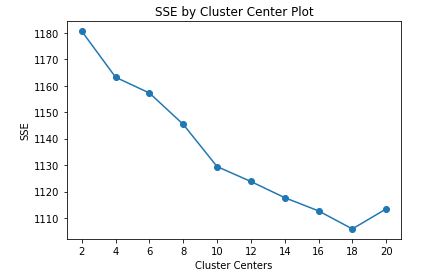

In [192]:
from IPython.display import Image
Image(filename='elbow1.png')

In [196]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_matrix)

PCA = análisis de componentes principales : Es un algoritmo de reducción de dimensionalidad que permite la visualización en 2 o 3 dimensiones de conjuntos de datos de un mayor número de dimensiones

TSNE = t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

https://www.interactivechaos.com/manual/tutorial-de-machine-learning/t-sne

t-SNE (T-distributed Stochastic Neighbor Embedding) es un algoritmo diseñado para la visualización de conjuntos de datos de alta dimensionalidad. Si el número de dimensiones es muy alto, Scikit-Learn recomienda en su documentación utilizar un método de reducción de dimensionalidad previo (como PCA) para reducir el conjunto de datos a un número de dimensiones razonable (por ejemplo 50), lo que reducirá el ruido y aligerará la ejecución de t-SNE.

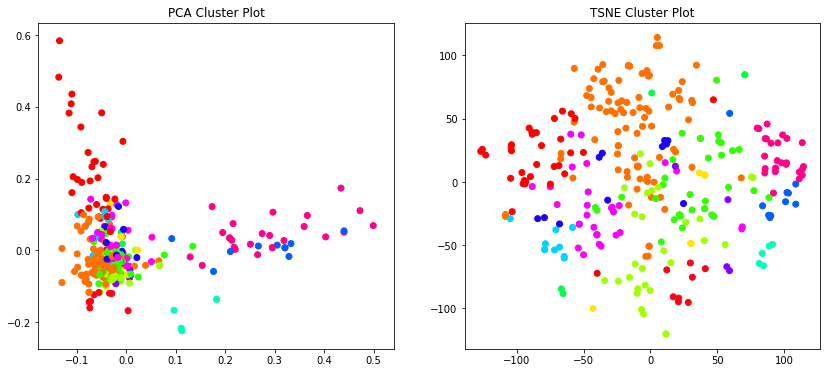

In [197]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf_matrix, clusters)

In [198]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    #display(df)
    #I=Number for row, r=content of dataframe
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        #print(np.argsort(r)[-n_terms:])
        #print(labels[18109])
        #print(labels[18239])
        #print(labels[18228])  
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_matrix, clusters, matrix_vocab, 10)


Cluster 0
mundial,vacuna,cepa,salud,covid19,oms,china,brote,virus,coronavirus

Cluster 1
policía,the,foto,ve,grabado,coronavirus,persona,imagen,imágenes,vídeo

Cluster 2
mensajes,titulares,whatsapp,satírico,real,titular,diario,coronavirus,web,contenido

Cluster 3
país,contenido,publicado,frase,aparece,real,vox,captura,imagen,tuit

Cluster 4
guardia,decreto,documento,ayudas,ley,alarma,euro,ministerio,persona,gobierno

Cluster 5
echaremos,defensa,difícil,podrás,ciudades,hora,drone,málaga,semana,maldita

Cluster 6
utilidad,trader,falsas,timarte,inversión,dinero,programa,hormiguero,timo,bitcoin

Cluster 7
universitario,marzo,médico,paz,vídeo,audio,coronavirus,madrid,pacientes,hospital

Cluster 8
agencia,email,electrónico,mensaje,tributaria,sm,datos,correo,phishing,correos

Cluster 9
abril,coronavirus,cruz,denuncia,roja,constancia,material,local,audio,policía

Cluster 10
bebé,feministas,twitter,tarta,tuits,valentivaliente,troll,cuentas,feminismo,feminista

Cluster 11
mensaje,salud,consejer

Se puede asumir que mensaje y mensajes son clasificadas diferente porque el lematizador diferencia entre verbos y nombres -> mensajear != mensaje/mensajes

Debo quitar palabra como The, ma , sm en las stopwords ya que es ruido? o lo tengo que dejar para ver que también hay ciertos "errores"